In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter

In [5]:
df_train=pd.read_csv("/Users/kumar/downloads/svminpython/Credit_Risk_Train_data.csv")

In [6]:
df_test = pd.read_csv("/Users/kumar/downloads/svminpython/Credit_Risk_Validate_data.csv")

In [7]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [31]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
outcome               0
dtype: int64

In [11]:
df_test.rename(columns= {'outcome':'Loan_Status'})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Y


In [61]:
all= pd.concat([df_train,df_test], axis = 0)

In [64]:
all.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,outcome
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,NaN
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,NaN
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,NaN
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,NaN
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,NaN


In [63]:
all.reset_index(inplace=True, drop= True)

In [65]:
from collections import Counter

In [66]:
all['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [67]:
Counter(all['Married'])

Counter({nan: 3, 'No': 347, 'Yes': 631})

In [68]:
a=all[all['Married'].isnull()].index

In [69]:
a

Int64Index([104, 228, 435], dtype='int64')

In [70]:
all['Married'].iloc[a]="Yes"  #np.repeat("Yes", 3)

In [125]:
all.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
outcome              614
dtype: int64

In [72]:
Counter(all['Gender'])

Counter({nan: 24, 'Female': 182, 'Male': 775})

In [73]:
all['Gender'].fillna(value= "Male", inplace=True)

In [74]:
Counter(all['Gender'])

Counter({'Female': 182, 'Male': 799})

In [75]:
Counter(all['Dependents'])

Counter({nan: 25, '0': 545, '1': 160, '2': 160, '3+': 91})

In [76]:
pd.crosstab(all['Dependents'].isnull(),all['Married'])

Married,No,Yes
Dependents,,
False,338,618
True,9,16


In [78]:
all[all['Married']=="No"]['Dependents'].value_counts()

0     276
1      36
2      14
3+     12
Name: Dependents, dtype: int64

In [95]:
b=all[(all['Married']=="No") & (all['Dependents'].isnull())]['Dependents'].index.tolist()

In [96]:
b

[293, 332, 355, 597, 684, 752, 879, 916, 926]

In [97]:
all['Dependents'].iloc[b]="0"

In [99]:
all[all['Married']=="Yes"]['Dependents'].value_counts()

0     269
2     146
1     124
3+     79
Name: Dependents, dtype: int64

In [100]:
all['Dependents'].fillna(value= "0", inplace=True)

In [102]:
all['Self_Employed'].fillna(value= "No", inplace=True)

In [104]:
import matplotlib.pyplot as plt

In [107]:
import seaborn as sns

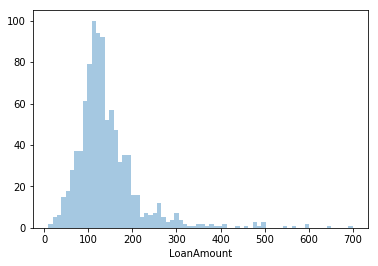

In [111]:
sns.distplot(all['LoanAmount'].dropna(),kde=False,bins=70)

In [109]:
Counter(all['LoanAmount'])

Counter({nan: 1,
         nan: 1,
         nan: 1,
         9.0: 1,
         17.0: 1,
         25.0: 2,
         26.0: 1,
         28.0: 2,
         30.0: 3,
         nan: 1,
         35.0: 2,
         36.0: 1,
         40.0: 5,
         42.0: 1,
         44.0: 2,
         45.0: 2,
         46.0: 2,
         47.0: 1,
         48.0: 2,
         49.0: 1,
         50.0: 6,
         53.0: 1,
         54.0: 1,
         55.0: 5,
         56.0: 2,
         57.0: 1,
         58.0: 1,
         59.0: 2,
         60.0: 5,
         61.0: 2,
         62.0: 1,
         63.0: 1,
         64.0: 2,
         65.0: 5,
         66.0: 5,
         67.0: 4,
         68.0: 1,
         70.0: 12,
         71.0: 6,
         72.0: 2,
         73.0: 1,
         74.0: 4,
         75.0: 5,
         76.0: 3,
         77.0: 1,
         78.0: 3,
         nan: 1,
         79.0: 1,
         80.0: 12,
         81.0: 8,
         83.0: 3,
         84.0: 7,
         85.0: 2,
         86.0: 1,
         87.0: 3,
         88.0:

In [112]:
Counter(all['Loan_Amount_Term'])

Counter({nan: 1,
         nan: 1,
         nan: 1,
         12.0: 2,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         6.0: 1,
         36.0: 3,
         60.0: 3,
         180.0: 66,
         240.0: 8,
         300.0: 20,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         84.0: 7,
         120.0: 4,
         nan: 1,
         350.0: 1,
         360.0: 823,
         480.0: 23,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

In [116]:
pd.crosstab(all['LoanAmount'].isnull(),all['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [117]:
all.groupby(all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [120]:
x=all['LoanAmount'].mean()
x

142.51153039832286

In [121]:
all['LoanAmount'].fillna(value="x" , inplace=True)

In [123]:
all['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [124]:
all['Loan_Amount_Term'].fillna(value="360.0" , inplace=True)

In [127]:
Counter(all['Credit_History'])

Counter({0.0: 148,
         1.0: 754,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         n

In [128]:
test = all['Credit_History'].isnull()

In [131]:
Counter(test)

Counter({False: 902, True: 79})